In [1]:
from google.colab import files
uploaded = files.upload()

Saving bottle.csv to bottle (1).csv
Saving LIC_stock.csv to LIC_stock (1).csv


Swasthika M 24BAD121
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')
MSE: 6.2214468826180624
RMSE: 2.4942828393384064
R2 Score: 0.6492792001567064


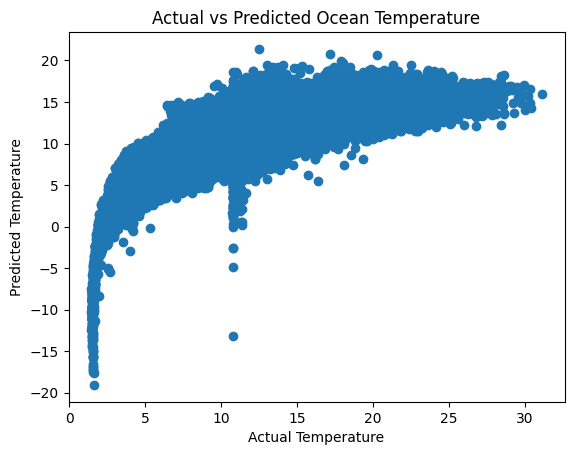

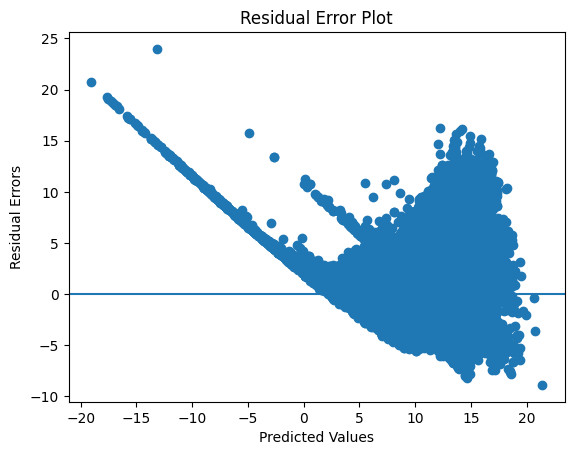

Ridge R2 Score: 0.649279200458081
Lasso R2 Score: 0.6492263454624063
        Importance
Depthm   -1.952106
Salnty    0.862655
O2ml_L    2.589813


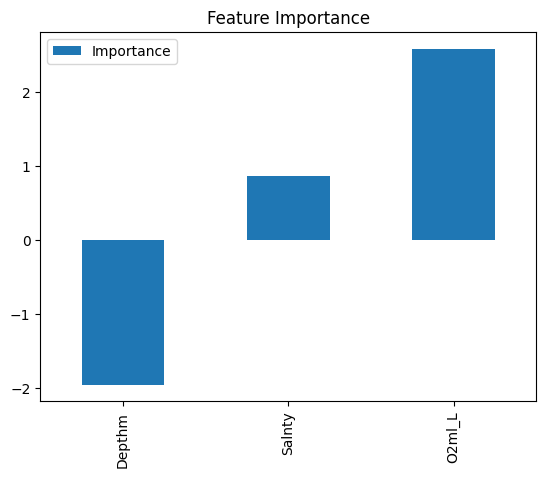

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
print("Swasthika M 24BAD121")
df = pd.read_csv("bottle.csv", low_memory=False)
print(df.columns)
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'
df = df[features + [target]]
df.fillna(df.mean(), inplace=True)
X = df[features]
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Ocean Temperature")
plt.show()
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residual Errors")
plt.title("Residual Error Plot")
plt.show()
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Ridge R2 Score:", r2_score(y_test, ridge_pred))
print("Lasso R2 Score:", r2_score(y_test, lasso_pred))
coefficients = pd.DataFrame(model.coef_, features, columns=["Importance"])
print(coefficients)
coefficients.plot(kind='bar')
plt.title("Feature Importance")
plt.show()


Swasthika M 24BAD121
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Accuracy: 0.6132971506105834
Confusion Matrix:
 [[443   0]
 [285   9]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       443
           1       1.00      0.03      0.06       294

    accuracy                           0.61       737
   macro avg       0.80      0.52      0.41       737
weighted avg       0.76      0.61      0.48       737



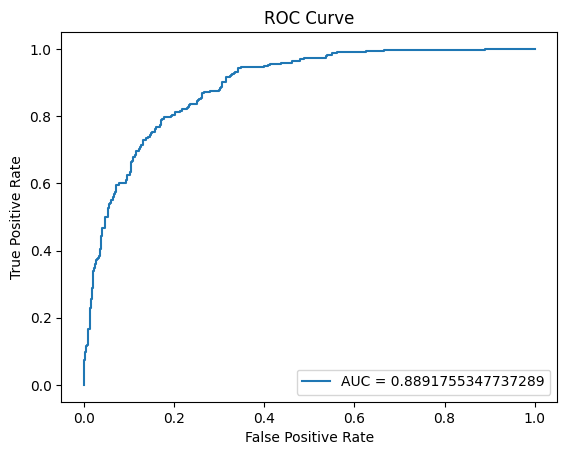

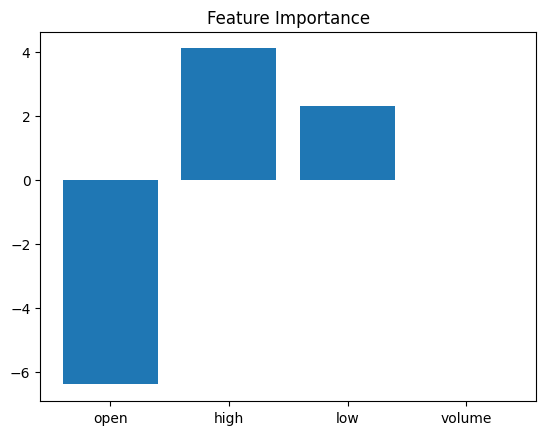

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
print("Swasthika M 24BAD121")
df = pd.read_csv("LIC_stock.csv")
print(df.columns)

open_col = [col for col in df.columns if "open" in col.lower()][0]
close_col = [col for col in df.columns if "close" in col.lower()][0]
high_col = [col for col in df.columns if "high" in col.lower()][0]
low_col = [col for col in df.columns if "low" in col.lower()][0]
volume_col = [col for col in df.columns if "vol" in col.lower()][0]

df['Price_Movement'] = np.where(df[close_col] > df[open_col], 1, 0)

features = [open_col, high_col, low_col, volume_col]
target = 'Price_Movement'

df = df[features + [target]]

df.fillna(df.mean(), inplace=True)

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LogisticRegression(C=1.0, penalty='l2')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = " + str(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

importance = model.coef_[0]
plt.bar(features, importance)
plt.title("Feature Importance")
plt.show()
